# `K-Means Clustering - Customer Segmentation`

You are the owner of a large store and you have historical data about customers and purchase such as age, gender, annual income and spending score. Spending Score is something you have assigned to each customer based on certain purchase related parameters (not part of this dataset).

<b>Problem Statement:</b>
You would like to find out `Clusters or Groups of patterns among the customers` so that you can run `targetted campaigns to promote your marchandise`.

#### Solution Approach: We have decided to use `K-Means Clustering Algorithm` on your Data to find Clusters of customers with similar patterns.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

First let's explore the dataset first

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.duplicated().sum()

0

No need to clean the dataset

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---

# Data Exploration and Visualization

### Plot pairwise relationships between features in a dataset.

<Figure size 1600x1000 with 0 Axes>

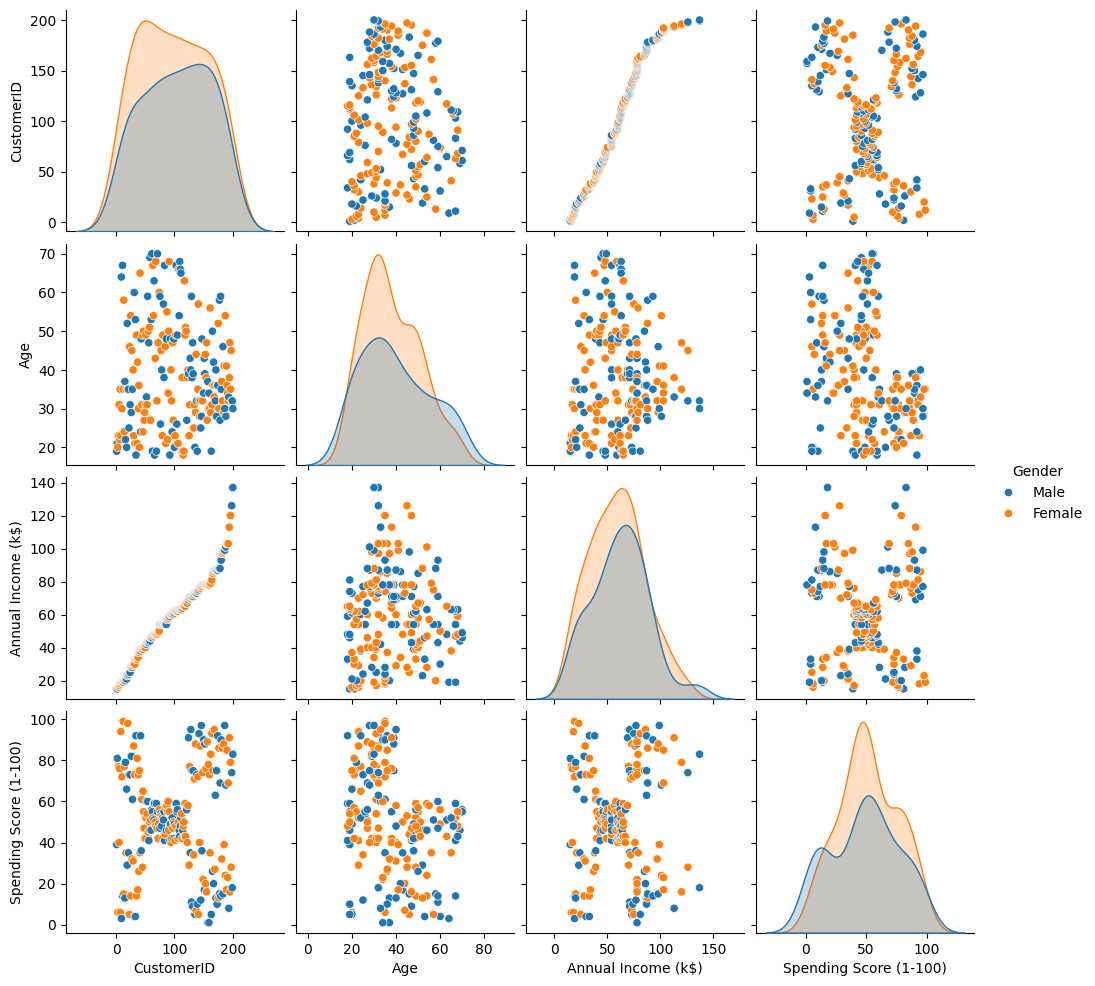

In [8]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

### Distribution of Genders in the Data

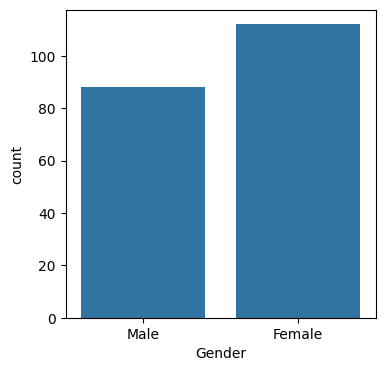

In [9]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

### Transform Gender to 0's and 1's

In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0})

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Distribution of numerical features (Age, Annual income & Spending score)

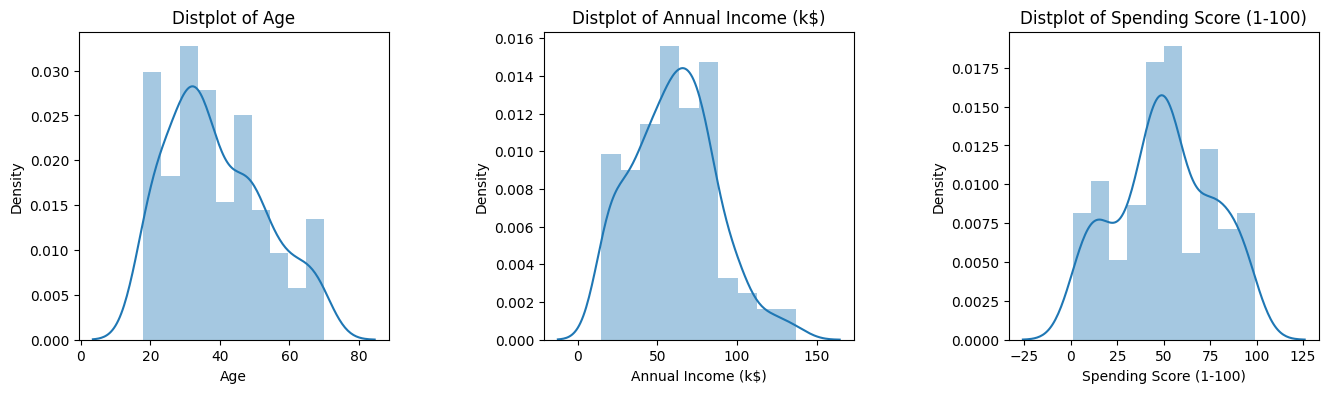

In [13]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Build our K-Means Model

In [15]:
X = df.iloc[:, -4:] # : select all rows, -4: select last 4 columns
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### We will create K-Means Models `iteratively between k values of 3 to 10` and at each step, capture the `Silhoutte Score` and `Inertia (Sum of Squared Distances)`

In [16]:
km_inertias, km_scores = [], []

for k in range(3, 10):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X, km.labels_)}")

Processing K-Means with k = 3, Intertia = 143391.5923603568, Silhoutte Score = 0.383798873822341
Processing K-Means with k = 4, Intertia = 104434.82333370819, Silhoutte Score = 0.4067767360772861
Processing K-Means with k = 5, Intertia = 79325.58616149588, Silhoutte Score = 0.42575142602357424
Processing K-Means with k = 6, Intertia = 58362.95546871429, Silhoutte Score = 0.45135798674732636
Processing K-Means with k = 7, Intertia = 67710.95128957999, Silhoutte Score = 0.3593164373250828
Processing K-Means with k = 8, Intertia = 47839.143339993345, Silhoutte Score = 0.42089214828593163
Processing K-Means with k = 9, Intertia = 40674.15455050491, Silhoutte Score = 0.41273936332819244


### Elbow Method to find Optimum k

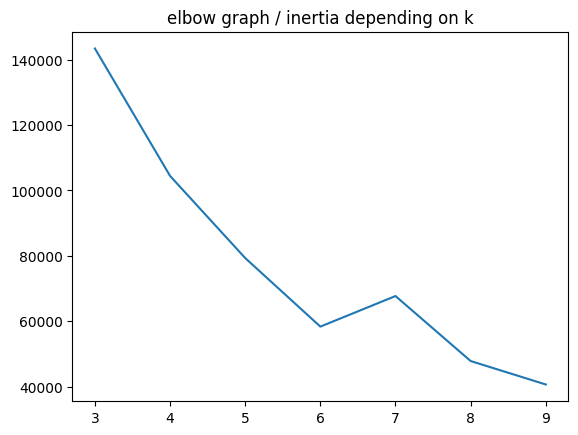

In [19]:
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

### Silhoutte Method for optimum k

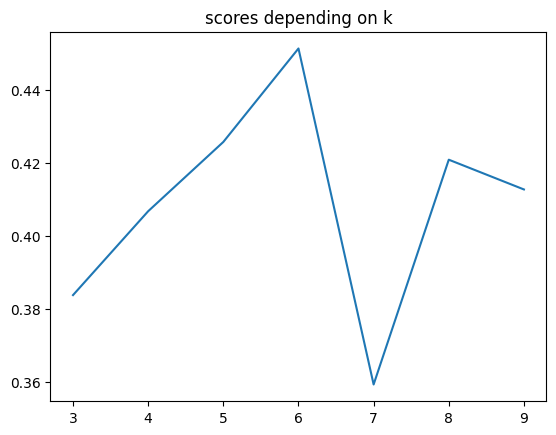

In [20]:
sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()

### We determine our optimum value of k to be 6 from the above two methods and run K-Means again with k=6

In [21]:
km = KMeans(n_clusters=7).fit(X)

In [22]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### Assign the Cluster Labels to the Data

In [23]:
X['Label'] = km.labels_
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,6
197,1,32,126,74,3
198,1,32,137,18,6


In [27]:
X['Label'].unique()

array([4, 0, 1, 5, 3, 2, 6])

In [28]:
X[X['Label']==4]["Spending Score (1-100)"].mean()

20.272727272727273

In [29]:
pivot = X.pivot_table(values=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'], index=['Label'], aggfunc=np.mean)
pivot

,Age,Annual Income (k$),Spending Score (1-100)
Label,,,
0,25.272727,25.727273,79.363636
1,56.340909,53.704545,49.386364
2,41.230769,79.269231,15.923077
3,32.692308,86.538462,82.128205
4,44.318182,25.772727,20.272727
5,27.108108,56.297297,49.675676
6,41.000000,109.700000,22.000000


## Visualization  of the Clusters in a 3D scatter plot

In [30]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,6
197,1,32,126,74,3
198,1,32,137,18,6


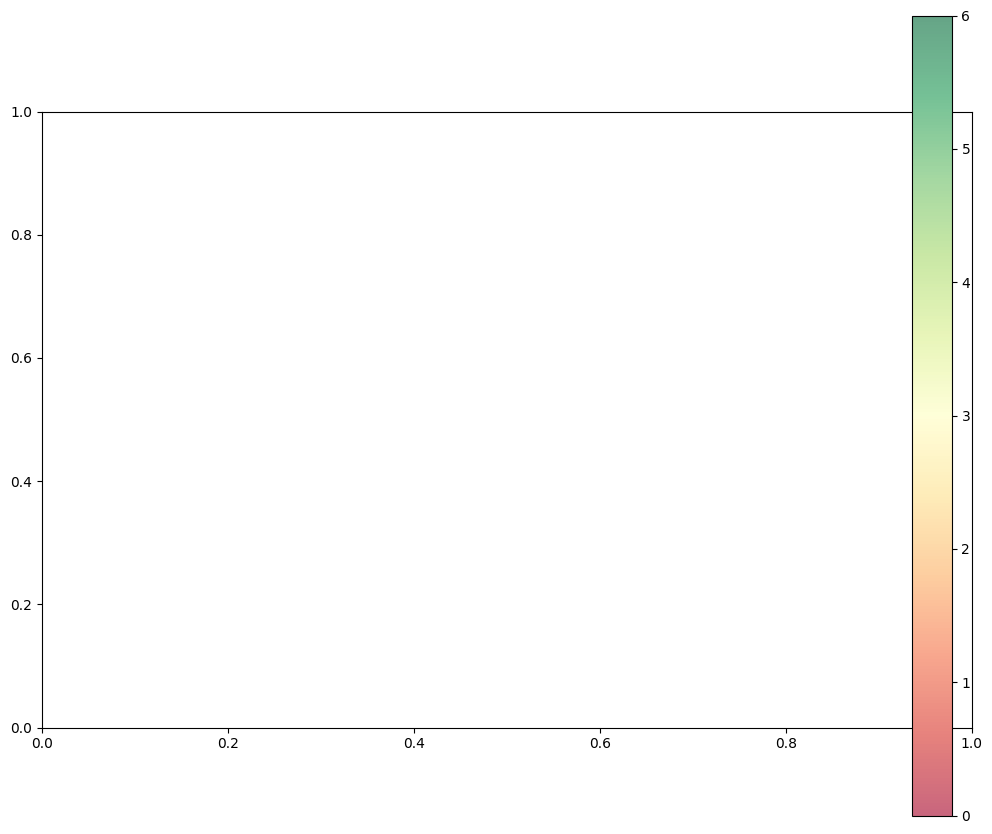

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

xs = X['Age']
ys = X['Annual Income (k$)']
zs = X['Spending Score (1-100)']
im = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='RdYlGn')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

#### The 3-D Visualisation displays the clustering fairly clear. However, should your dimensionality is > 3, you may need to resort to a dimensionality reduction technique to sqeeze the Data into a 2 or 3 dimensional space before trying the visualisation.

## Analysis of Each Cluster a bit more

In [32]:
X.Label.value_counts()

Label
1    44
3    39
5    37
2    26
4    22
0    22
6    10
Name: count, dtype: int64

In [33]:
for k in range(6):
    print(f'Cluster nb : {k}')
    print(X[X.Label == k].describe().iloc[:, 1:-1])
    print('\n\n')

Cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  22.000000           22.000000               22.000000
mean   25.272727           25.727273               79.363636
std     5.257030            7.566731               10.504174
min    18.000000           15.000000               61.000000
25%    21.250000           19.250000               73.000000
50%    23.500000           24.500000               77.000000
75%    29.750000           32.250000               85.750000
max    35.000000           39.000000               99.000000



Cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  44.000000           44.000000               44.000000
mean   56.340909           53.704545               49.386364
std     8.550651            8.239382                5.993081
min    43.000000           38.000000               35.000000
25%    49.000000           47.000000               45.750000
50%    54.000000           54.000000               4